In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

In [44]:
train = pd.read_csv('../Data/train.csv')
train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [20]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

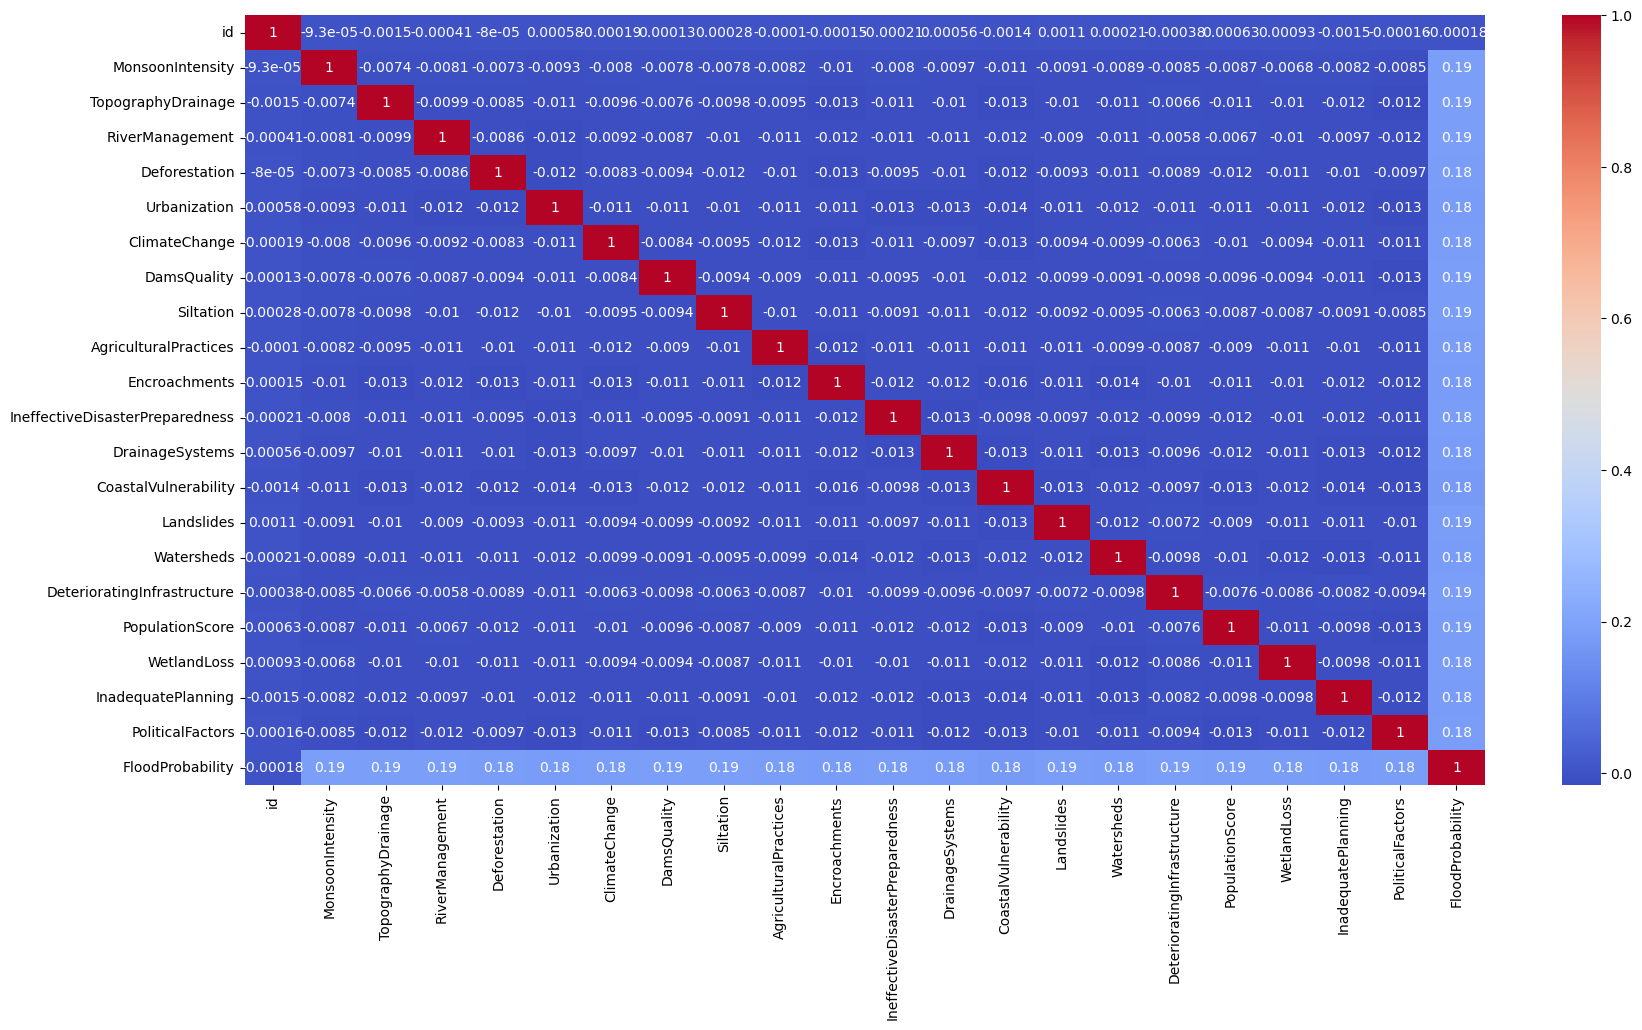

In [62]:
plt.figure(figsize=(20,10))

sns.heatmap(train.corr(), cmap='coolwarm', annot=True);


In [63]:
train['deforestxclimate'] = train['Deforestation'] * train['ClimateChange']
train['drain'] = train['TopographyDrainage'] * train['DrainageSystems']
train['politics'] = train['InadequatePlanning'] * train['PoliticalFactors']

<Axes: >

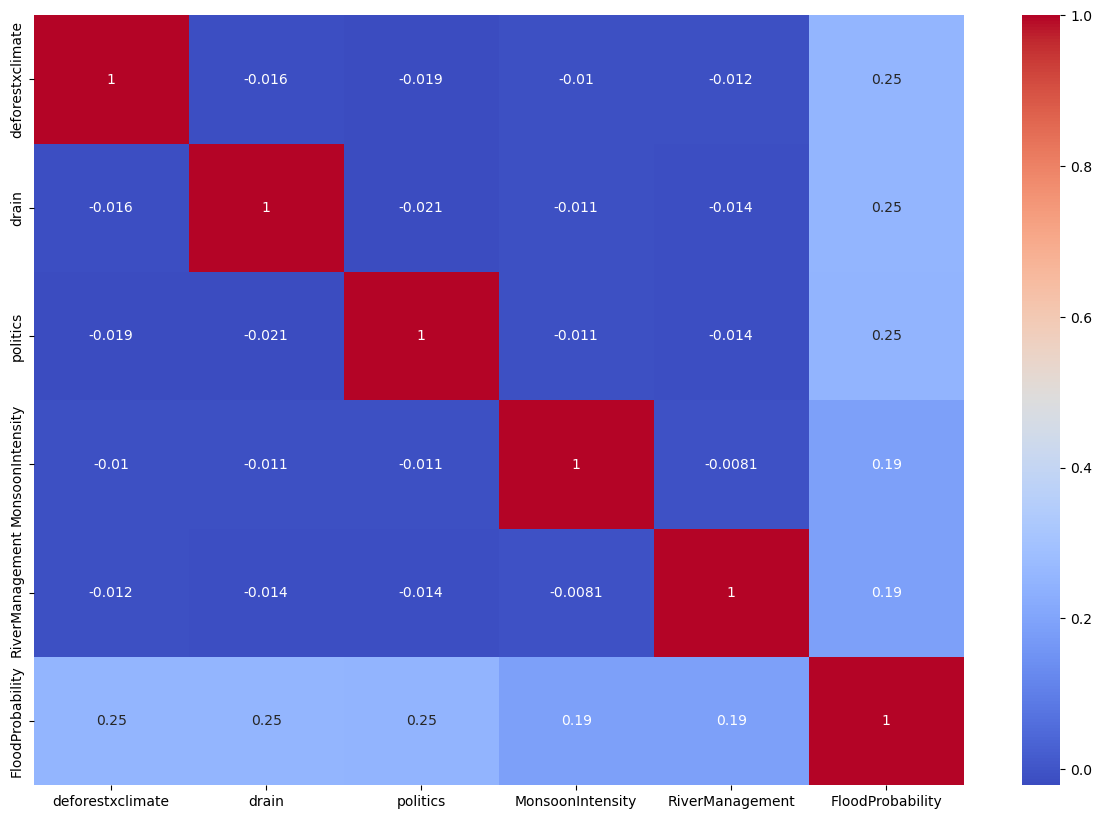

In [69]:
selected = train[['deforestxclimate', 'drain', 'politics', 'MonsoonIntensity', 'RiverManagement', 'FloodProbability']]

plt.figure(figsize=(15,10))
sns.heatmap(selected.corr(), cmap='coolwarm', annot=True)

Bench Mark Model

In [45]:
X = train.drop(columns=['id','FloodProbability'])
y = train['FloodProbability']

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8450306764524692

In [24]:
lr.score(X_val, y_val)

0.8447057763250218

StandardScalar model

In [25]:
sc = StandardScaler()
X_trainsc = sc.fit_transform(X_train)
X_valsc = sc.transform(X_val)


In [26]:
lr2 = LinearRegression()
lr2.fit(X_trainsc, y_train)
lr2.score(X_trainsc, y_train)

0.8450306764524692

In [27]:
lr2.score(X_valsc, y_val)

0.8447057763250218

Poly and standard scalar

In [47]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [48]:
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

scpoly = StandardScaler()
X_polysc = scpoly.fit_transform(X_poly)

In [49]:
X1_trainpolysc, X1_valpolysc, y1_trainpoly, y1_valpoly = train_test_split(X_polysc, y, random_state=42)

In [14]:
lr3 = LinearRegression()
lr3.fit(X1_train, y1_train)
lr3.score(X1_train, y1_train)

0.8456372703227519

In [15]:
lr3.score(X1_val, y1_val)

0.8452910562909939

In [80]:
from sklearn.linear_model import RidgeCV

In [17]:
%%time
r_alphas = np.logspace(-2, 5, 100)
ridge_cv = RidgeCV(alphas=r_alphas, cv=10)
ridge_cv.fit(X1_train, y1_train)

CPU times: user 2h 42min 13s, sys: 17min 18s, total: 2h 59min 31s
Wall time: 29min 9s


RidgeCV(alphas=array([1.00000000e-02, 1.17681195e-02, 1.38488637e-02, 1.62975083e-02,
       1.91791026e-02, 2.25701972e-02, 2.65608778e-02, 3.12571585e-02,
       3.67837977e-02, 4.32876128e-02, 5.09413801e-02, 5.99484250e-02,
       7.05480231e-02, 8.30217568e-02, 9.77009957e-02, 1.14975700e-01,
       1.35304777e-01, 1.59228279e-01, 1.87381742e-01, 2.20513074e-01,
       2.59502421e-01, 3.05385551e-0...
       2.36448941e+03, 2.78255940e+03, 3.27454916e+03, 3.85352859e+03,
       4.53487851e+03, 5.33669923e+03, 6.28029144e+03, 7.39072203e+03,
       8.69749003e+03, 1.02353102e+04, 1.20450354e+04, 1.41747416e+04,
       1.66810054e+04, 1.96304065e+04, 2.31012970e+04, 2.71858824e+04,
       3.19926714e+04, 3.76493581e+04, 4.43062146e+04, 5.21400829e+04,
       6.13590727e+04, 7.22080902e+04, 8.49753436e+04, 1.00000000e+05]),
        cv=10)

In [18]:
ridge_cv.best_score_

0.8455431918042

In [19]:
ridge_cv.score(X1_train, y1_train)

0.8456372597571806

In [20]:
ridge_cv.score(X1_val, y1_val)

0.8452912364916261

In [21]:
X = train.drop(columns=['id','FloodProbability'])
y = train['FloodProbability']

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [23]:
%%time
r_alphas = np.logspace(-2, 5, 50)
ridge_cv = RidgeCV(alphas=r_alphas, cv=10)
ridge_cv.fit(X_train, y_train)

CPU times: user 3min 57s, sys: 2min 33s, total: 6min 30s
Wall time: 52.3 s


RidgeCV(alphas=array([1.00000000e-02, 1.38949549e-02, 1.93069773e-02, 2.68269580e-02,
       3.72759372e-02, 5.17947468e-02, 7.19685673e-02, 1.00000000e-01,
       1.38949549e-01, 1.93069773e-01, 2.68269580e-01, 3.72759372e-01,
       5.17947468e-01, 7.19685673e-01, 1.00000000e+00, 1.38949549e+00,
       1.93069773e+00, 2.68269580e+00, 3.72759372e+00, 5.17947468e+00,
       7.19685673e+00, 1.00000000e+0...
       2.68269580e+01, 3.72759372e+01, 5.17947468e+01, 7.19685673e+01,
       1.00000000e+02, 1.38949549e+02, 1.93069773e+02, 2.68269580e+02,
       3.72759372e+02, 5.17947468e+02, 7.19685673e+02, 1.00000000e+03,
       1.38949549e+03, 1.93069773e+03, 2.68269580e+03, 3.72759372e+03,
       5.17947468e+03, 7.19685673e+03, 1.00000000e+04, 1.38949549e+04,
       1.93069773e+04, 2.68269580e+04, 3.72759372e+04, 5.17947468e+04,
       7.19685673e+04, 1.00000000e+05]),
        cv=10)

In [24]:
ridge_cv.score(X_train, y_train)

0.8450306764423855

In [25]:
ridge_cv.score(X_val, y_val)

0.844705777074947

Random Forest

In [26]:
rf = RandomForestRegressor()
rf.fit(X_trainsc, y_train)
rf.score(X_trainsc, y_train), rf.score(X_valsc, y_val)

(0.9510270342731438, 0.6541642438491279)

Lasso

In [27]:
las = Lasso(max_iter=1000,alpha=0.1)
las.fit(X_train, y_train)
las.score(X_train, y_train), las.score(X_val, y_val)

(0.0, -6.036083950444748e-07)

In [28]:
las1 = Lasso(max_iter=1000, alpha=0.1)
las1.fit(X_trainsc, y_train)
las1.score(X_trainsc, y_train), las1.score(X_valsc, y_val)

(0.0, -6.036083950444748e-07)

In [29]:
las = Lasso(max_iter=1000,alpha=0.1)
las.fit(X1_train, y_train)
las.score(X1_train, y_train), las.score(X1_val, y_val)

(0.0, -6.036083950444748e-07)

Random Forest with GradBoost and Random Search

In [33]:
params = {
    'max_features': np.arange(5, X.shape[1] + 1),
    'max_depth': np.append(np.arange(1, 50), None),
    'min_samples_leaf': [2, 3],   
    'n_estimators': [50, 100, 150]
}

rf = GradientBoostingRegressor(random_state = 42)

rf = RandomizedSearchCV(rf, params, n_iter=10, cv = 5, n_jobs = -1)

In [34]:
%%time
rf.fit(X_train, y_train)

/Users/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 2min 54s, sys: 1.01 s, total: 2min 55s
Wall time: 1h 10min 39s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, None],
      dtype=object),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'min_samples_leaf': [2, 3],
                                        'n_estimators': [50, 100, 150]})

In [35]:
rf.score(X_train, y_train), rf.score(X_val, y_val)

(0.9939100754819915, 0.7208527211491504)

In [36]:
rf.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 19}

In [47]:
params2 = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'min_samples_leaf': [2, 3],
    'n_estimators': [50, 100, 150]
}

rf2 = GradientBoostingRegressor(random_state = 42)

rf2 = RandomizedSearchCV(rf2, params2, n_iter=10, cv = 5, n_jobs = -1)

In [48]:
%%time
rf2.fit(X_trainsc, y_train)

CPU times: user 3min 58s, sys: 651 ms, total: 3min 58s
Wall time: 21min 9s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 14],
                                        'min_samples_leaf': [2, 3],
                                        'n_estimators': [50, 100, 150]})

In [49]:
rf2.score(X_trainsc, y_train), rf2.score(X_valsc, y_val)

(0.8602898832793927, 0.8196195663775501)

In [51]:
rf2.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 2,
 'max_features': 9,
 'max_depth': 10}

In [16]:
params3 = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'min_samples_leaf': [2, 3],
    'n_estimators': [50, 100, 150]
}

rf3 = GradientBoostingRegressor(random_state = 42)

rf3 = RandomizedSearchCV(rf3, params3, n_iter=10, cv = 5, n_jobs = -1)

In [ ]:
rf3.score(X1_train, y_train), rf3.score(X1_val, y_val)

KNN

In [14]:
knn = KNeighborsRegressor()
knn.fit(X_trainsc, y_train)
knn.score(X_trainsc, y_train), knn.score(X_valsc, y_val)

(0.7782728858283601, 0.6690539267399329)

In [33]:
params = {
    'max_features': np.arange(1, X.shape[1] + 1), 
    'max_depth': np.append(np.arange(1, 10), None), 
    'min_samples_leaf': np.arange(1, 31) 
}
kf = KFold(n_splits=10, shuffle=True, random_state=2023)
ranfor = RandomForestRegressor(
    n_estimators=100,
    random_state=2023
)

gs2 = RandomizedSearchCV(ranfor, params, cv=kf, n_jobs=-1)

In [34]:
%%time
gs2.fit(X_trainsc, y_train)

CPU times: user 2min 14s, sys: 819 ms, total: 2min 15s
Wall time: 31min 25s


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=2023, shuffle=True),
                   estimator=RandomForestRegressor(random_state=2023),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9, None], dtype=object),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [36]:
gs2.score(X_trainsc, y_train), gs2.score(X_valsc, y_val)

(0.6095286779352322, 0.5338710340570674)

In [38]:
ada = AdaBoostRegressor()
ada.fit(X_trainsc, y_train)
ada.score(X_trainsc, y_train), ada.score(X_valsc, y_val)

(0.5369163343092511, 0.5352014066065449)

In [41]:
bag = BaggingRegressor()
bag.fit(X_trainsc, y_train)
bag.score(X_trainsc, y_train), bag.score(X_valsc, y_val)

(0.9228607170880873, 0.5956239230828487)

In [50]:
bag1 = BaggingRegressor()
bag1.fit(X_train, y_train)
bag1.score(X_train, y_train), bag1.score(X_val, y_val)

(0.9228898756261452, 0.5962689868064275)

In [83]:
X1 = train.drop(columns=['id','FloodProbability', 'PoliticalFactors','Deforestation','ClimateChange',
                        'TopographyDrainage','DrainageSystems','InadequatePlanning'])
y1 = train['FloodProbability']

In [84]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, random_state=2024)

In [72]:
lr3 = LinearRegression()
lr3.fit(X_train1, y_train1)
lr3.score(X_train1, y_train1), lr3.score(X_val1, y_val1)

(0.8195574350859093, 0.8196011189286485)

In [73]:
ss = StandardScaler()
X_train1ss = ss.fit_transform(X_train1)
X_val1ss = ss.transform(X_val1)

In [74]:
lr4 = LinearRegression()
lr4.fit(X_train1ss, y_train1)
lr4.score(X_train1ss, y_train1), lr4.score(X_val1ss, y_val1)

(0.8195574350859093, 0.8196011189286485)

In [77]:
ada1 = AdaBoostRegressor()
ada.fit(X_train1ss, y_train1)
ada.score(X_train1ss, y_train1), ada.score(X_val1ss, y_val1)

(0.5444853293477863, 0.5437885089873429)

In [78]:
bag1 = BaggingRegressor()
bag1.fit(X_train1ss, y_train1)
bag1.score(X_train1ss, y_train1), bag1.score(X_val1ss, y_val1)

(0.9307579360157867, 0.63738460165171)

In [81]:
r_alphas = np.logspace(-2, 5, 50)
ridge_cv = RidgeCV(alphas=r_alphas, cv=10)
ridge_cv.fit(X_train1ss, y_train1)

RidgeCV(alphas=array([1.00000000e-02, 1.38949549e-02, 1.93069773e-02, 2.68269580e-02,
       3.72759372e-02, 5.17947468e-02, 7.19685673e-02, 1.00000000e-01,
       1.38949549e-01, 1.93069773e-01, 2.68269580e-01, 3.72759372e-01,
       5.17947468e-01, 7.19685673e-01, 1.00000000e+00, 1.38949549e+00,
       1.93069773e+00, 2.68269580e+00, 3.72759372e+00, 5.17947468e+00,
       7.19685673e+00, 1.00000000e+0...
       2.68269580e+01, 3.72759372e+01, 5.17947468e+01, 7.19685673e+01,
       1.00000000e+02, 1.38949549e+02, 1.93069773e+02, 2.68269580e+02,
       3.72759372e+02, 5.17947468e+02, 7.19685673e+02, 1.00000000e+03,
       1.38949549e+03, 1.93069773e+03, 2.68269580e+03, 3.72759372e+03,
       5.17947468e+03, 7.19685673e+03, 1.00000000e+04, 1.38949549e+04,
       1.93069773e+04, 2.68269580e+04, 3.72759372e+04, 5.17947468e+04,
       7.19685673e+04, 1.00000000e+05]),
        cv=10)

In [82]:
ridge_cv.score(X_train1ss, y_train1), ridge_cv.score(X_val1ss, y_val1)

(0.8195574350613122, 0.8196011174118583)

In [85]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X2poly = poly.fit_transform(X1)
X2_poly = pd.DataFrame(X_poly)

scpoly = StandardScaler()
X2_polysc = scpoly.fit_transform(X2_poly)

X2_train, X2_val, y2_train, y2_val = train_test_split(X2_polysc, y1, random_state=42)

In [87]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)
lr.score(X2_train, y2_train), lr.score(X2_val,y2_val)

(0.8456372703227519, 0.8452910562909939)

In [88]:
r_alphas = np.logspace(-2, 5, 50)
ridge_cv = RidgeCV(alphas=r_alphas, cv=10)
ridge_cv.fit(X2_train, y2_train)

RidgeCV(alphas=array([1.00000000e-02, 1.38949549e-02, 1.93069773e-02, 2.68269580e-02,
       3.72759372e-02, 5.17947468e-02, 7.19685673e-02, 1.00000000e-01,
       1.38949549e-01, 1.93069773e-01, 2.68269580e-01, 3.72759372e-01,
       5.17947468e-01, 7.19685673e-01, 1.00000000e+00, 1.38949549e+00,
       1.93069773e+00, 2.68269580e+00, 3.72759372e+00, 5.17947468e+00,
       7.19685673e+00, 1.00000000e+0...
       2.68269580e+01, 3.72759372e+01, 5.17947468e+01, 7.19685673e+01,
       1.00000000e+02, 1.38949549e+02, 1.93069773e+02, 2.68269580e+02,
       3.72759372e+02, 5.17947468e+02, 7.19685673e+02, 1.00000000e+03,
       1.38949549e+03, 1.93069773e+03, 2.68269580e+03, 3.72759372e+03,
       5.17947468e+03, 7.19685673e+03, 1.00000000e+04, 1.38949549e+04,
       1.93069773e+04, 2.68269580e+04, 3.72759372e+04, 5.17947468e+04,
       7.19685673e+04, 1.00000000e+05]),
        cv=10)

In [89]:
ridge_cv.score(X2_train, y2_train), ridge_cv.score(X2_val, y2_val)

(0.8456372616051041, 0.8452912208585264)

In [90]:
params = {
    'max_features': np.arange(1, X.shape[1] + 1), # p
    'max_depth': np.append(np.arange(1, 10), None), # 10
    'min_samples_leaf': np.arange(1, 31) # 30
}

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=2023
)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rs = RandomizedSearchCV(rf, params, n_iter=100, cv=kf, n_jobs=-1);

In [94]:
et2 = ExtraTreesRegressor(n_estimators=10)
et2.fit(X2_train, y2_train)
et2.score(X2_train, y2_train), et2.score(X2_val, y2_val)

(1.0, 0.7399157315136375)

In [96]:
%%time
et2 = ExtraTreesRegressor(n_estimators=10)
et2.fit(X_train1ss, y_train1)
et2.score(X_train1ss, y_train1), et2.score(X_val1ss, y_val1)


CPU times: user 31.5 s, sys: 394 ms, total: 31.9 s
Wall time: 32.4 s


(1.0, 0.6456349732616009)